# Retail Price Optimization

**Purpose**: Setting a price on a product is an imperative component of business and can either result in success or failure depending on how the process is handled. If executed correctly, the price of a product will not only be decided with the intent of generating as much profit as possible, but with the consideration of customer attraction as well. The retail price of a product that is more skewed toward maximizing returns will drive increased set prices which will usually decrease customer attraction, and therefore lead to low customer attractiveness to a product. The opposite is also destructive as setting too low of a price, even if customer attraction is high, results in not having a return on investment and perhaps revenue for the product running in the negative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('retail_price.csv')

In [3]:
column_dict = {'product_id':'A unique identifier for each product in the dataset.',
               'product_category_name': 'The name of the product category to which the product belongs.',
               'month_year': 'The month and year of the retail transaction or data recording.',
               'qty': 'The quantity of the product sold or purchased in a given transaction.',
               'total_price': 'The total price of the product, including any applicable taxes or discounts.',
               'freight_price': 'The cost of shipping or freight associated with the product.',
               'unit_price': 'The price of a single unit of the product.',
               'product_name_length': 'The length of the product name in terms of the number of characters.',
               'product_description_length': 'The length of the product description in terms of the number of characters.',
               'product_photos_qty': 'The number of photos available for the product in the dataset.',
               'product_weight_g': 'The weight of the product in grams.',
               'product_score': 'A score or rating associated with the product’s quality, popularity, or other relevant factors.',
               'customers': 'The number of customers who purchased the product in a given transaction.',
               'weekday': 'The day of the week on which the transaction occurred.',
               'weekend': 'A binary flag indicating whether the transaction occurred on a weekend (1) or not (0).',
               'holiday': 'A binary flag indicating whether the transaction occurred on a holiday (1) or not (0).',
               'month': 'The month in which the transaction occurred.',
               'year': 'The year in which the transaction occurred.',
               's': 'The effect of seasonality.',
               'comp_1, comp_2, comp_3': 'Competitor information or variables related to competitors’ prices, promotions, or other relevant factors.',
               'ps1, ps2, ps3': 'Product score or rating associated with competitors’ products.',
               'fp1, fp2, fp3': 'Freight or shipping cost associated with competitors’ products.'
              }
print('Dictionary')
print('----------')
for key, value in column_dict.items():
    print(f'{key}: {value}')
    print('')

Dictionary
----------
product_id: A unique identifier for each product in the dataset.

product_category_name: The name of the product category to which the product belongs.

month_year: The month and year of the retail transaction or data recording.

qty: The quantity of the product sold or purchased in a given transaction.

total_price: The total price of the product, including any applicable taxes or discounts.

freight_price: The cost of shipping or freight associated with the product.

unit_price: The price of a single unit of the product.

product_name_length: The length of the product name in terms of the number of characters.

product_description_length: The length of the product description in terms of the number of characters.

product_photos_qty: The number of photos available for the product in the dataset.

product_weight_g: The weight of the product in grams.

product_score: A score or rating associated with the product’s quality, popularity, or other relevant factors.

c

In [4]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


First, we will check for null values present in the dataset.

In [5]:
null_data = data.isnull().sum()
null_data

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

Null values are not present in the dataset.

We can quickly check descriptive stats for the dataset:

In [6]:
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


Now, we will be creating a histogram plot to visualize the distribution of total price of the products:

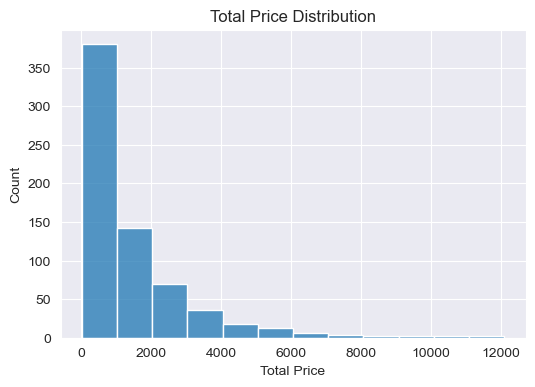

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='total_price', bins=12)
plt.title('Total Price Distribution')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.show()

Now, we will visualize the distribution of unit prices using a box plot:

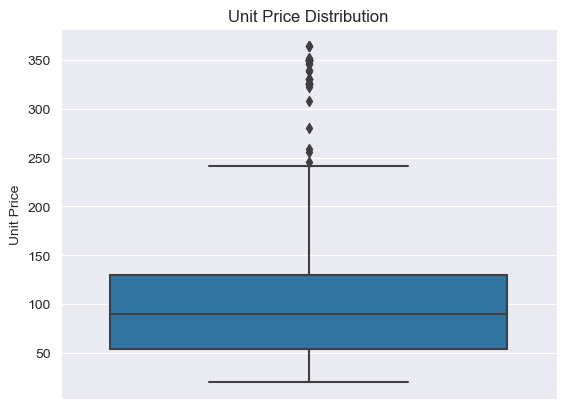

In [8]:
sns.boxplot(data=data, y='unit_price')
plt.title('Unit Price Distribution')
plt.ylabel('Unit Price')
plt.show()

We will now visualize the relationship between quantity and total price:

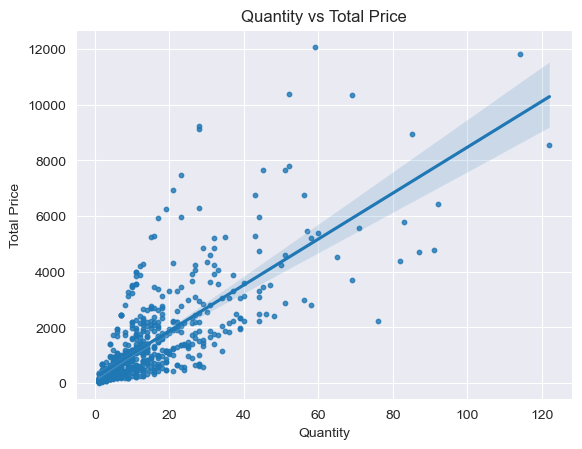

In [9]:
sns.regplot(data=data, x='qty', y='total_price', scatter_kws={'s': 10})
plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

From the Quantity vs Total Price graph we observe a linear relationship between quantity and total prices.

Let's statistically verify this relationship by determining the correlation among the two variables:

In [10]:
corr, _ = pearsonr(data['qty'], data['total_price'])
print(f'Pearson Correlation: {corr:.3f}')

Pearson Correlation: 0.750


A pearson correlation value of **0.750** indicates a relatively strong positive correlation between quantity and total price

Next, we will take a look at the average total prices by product categories:

In [11]:
categories = data['product_category_name']
average_prices = data.groupby('product_category_name')['total_price'].mean()

average_prices

product_category_name
bed_bath_table           1558.762623
computers_accessories    2059.390580
consoles_games            263.668182
cool_stuff               1016.777193
furniture_decor          1185.940833
garden_tools             1022.390875
health_beauty            1633.917231
perfumery                 781.250769
watches_gifts            2015.360874
Name: total_price, dtype: float64

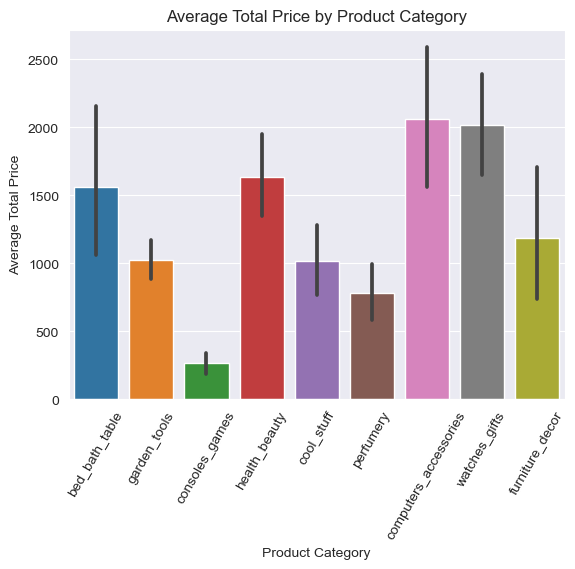

In [12]:
sns.barplot(data=data, x='product_category_name', y='total_price')
plt.title('Average Total Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=60)
plt.show()

We will now check out the distribution of total prices by weekday using boxplots:

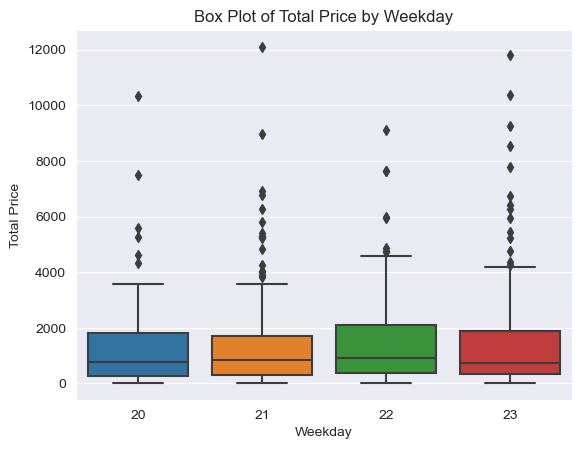

In [13]:
sns.boxplot(data=data, x='weekday', y='total_price')
plt.title('Box Plot of Total Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Price')
plt.show()

We will now check for the distribution of total prices by holiday:

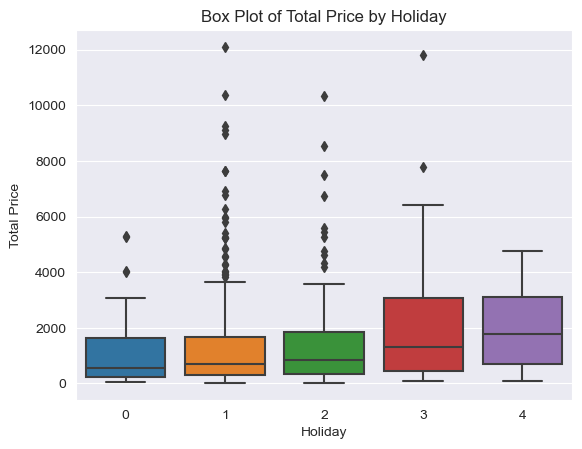

In [14]:
sns.boxplot(data=data, x='holiday', y='total_price')
plt.title('Box Plot of Total Price by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Total Price')
plt.show()

Let's take a look at the correlation between the numerical features with each other:

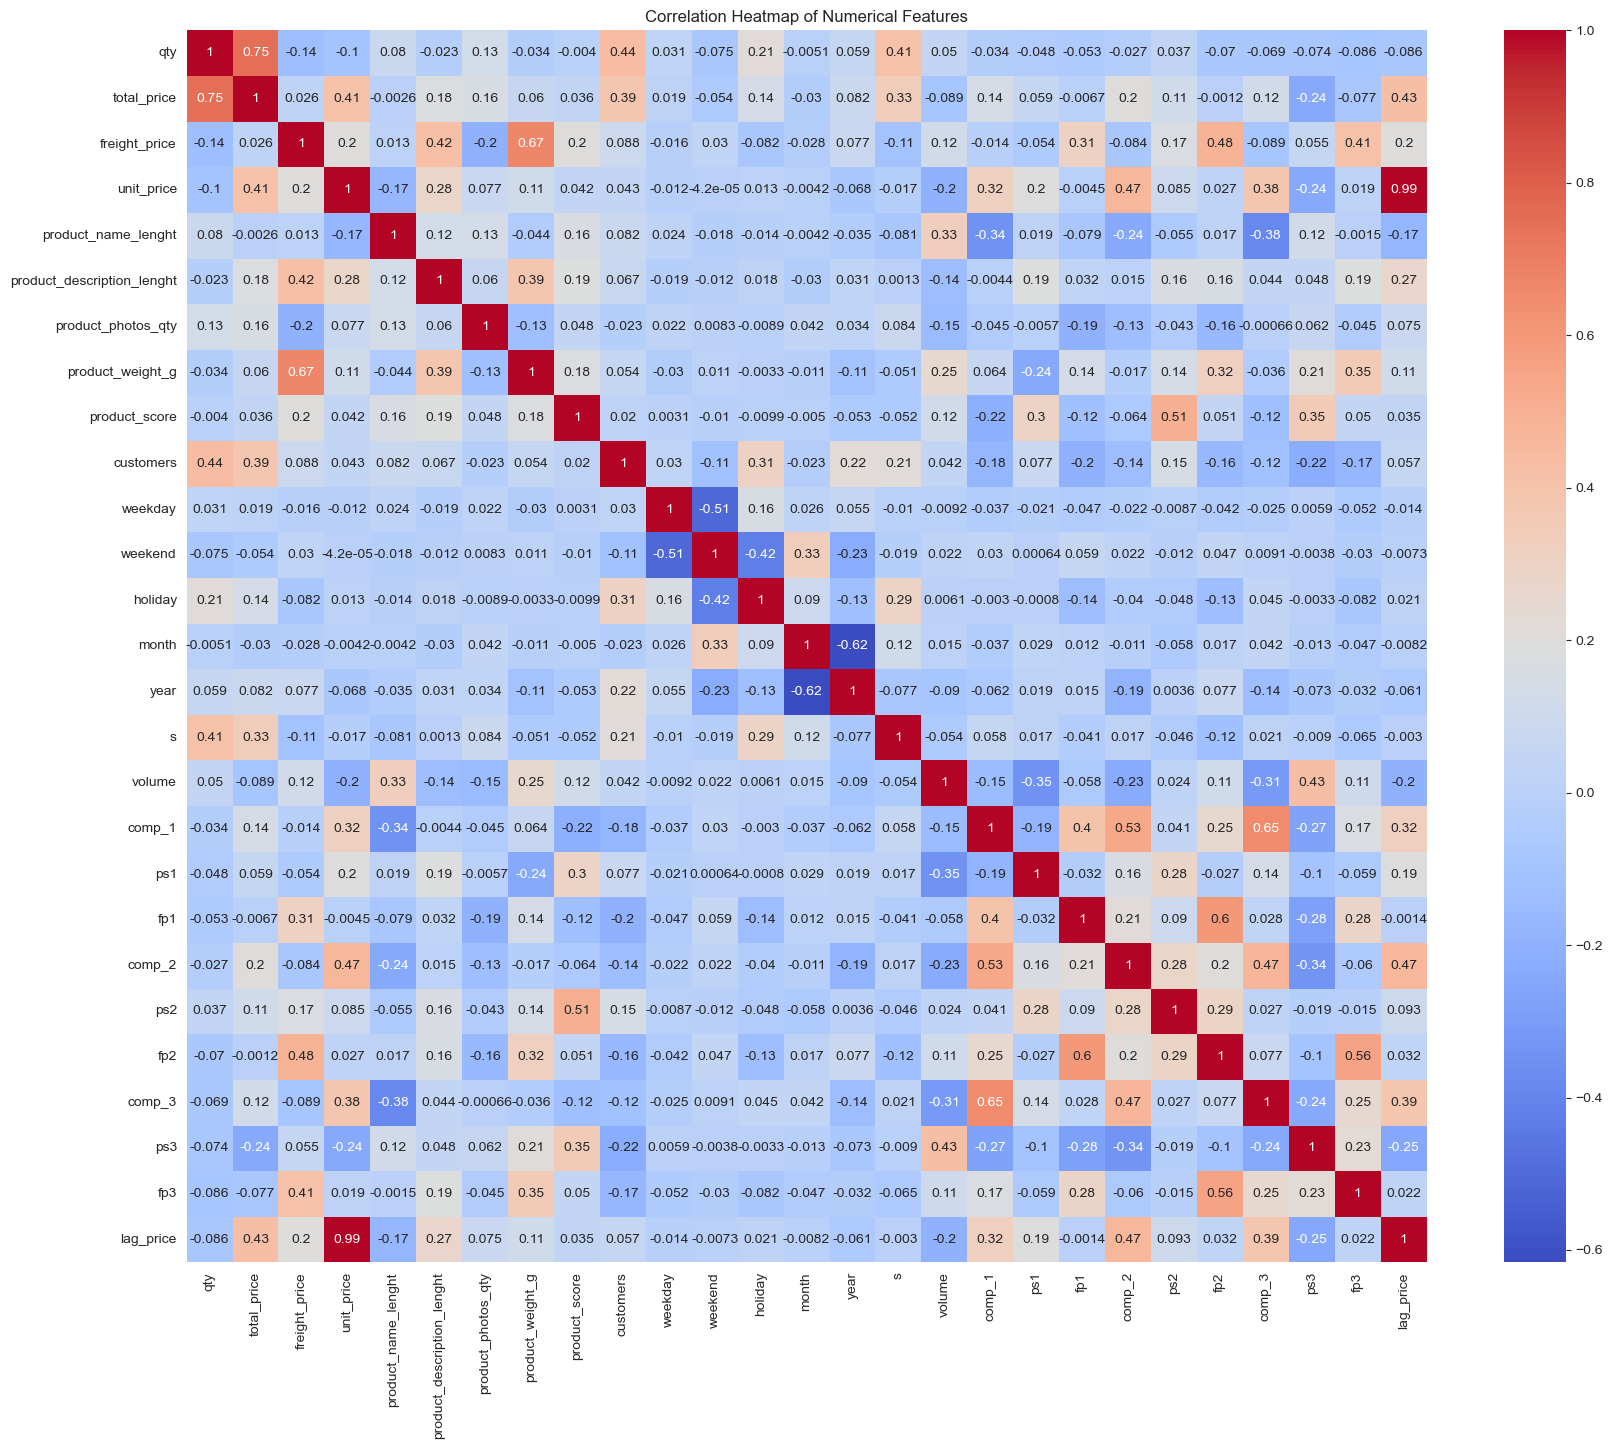

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

One thing to keep in mind when optimizing retail price is competitor comparisons. Other businesses have set prices as well and products must be competively priced so that consumers are more inclined to purchase a particular business's product over the other. This can be done by lowering the product price (e.g. discounts) to have the competitive edge in the overall market.

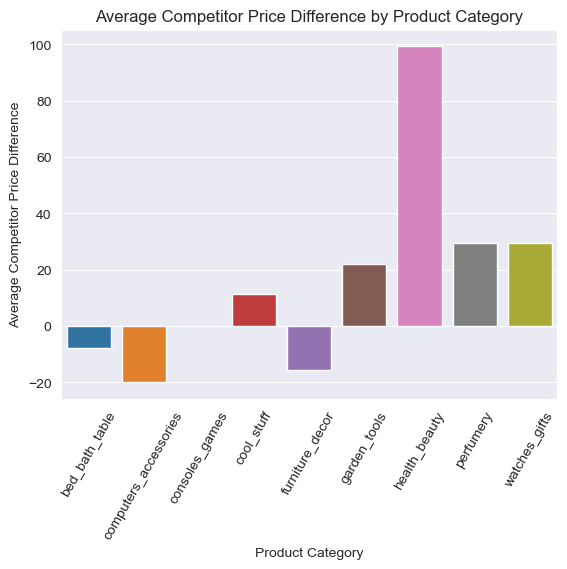

In [16]:
data['comp_price_diff'] = data['unit_price'] - data['comp_1']
avg_price_diff_by_category = data.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

sns.barplot(data=avg_price_diff_by_category, x='product_category_name', y='comp_price_diff')
plt.title('Average Competitor Price Difference by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Competitor Price Difference')
plt.xticks(rotation=60)
plt.show()

Retail Price Optimization Model:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [18]:
X = data[['qty', 'unit_price', 'comp_1', 'product_score', 'comp_price_diff']]
y = data['total_price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now it is time to train the linear regression model:

In [20]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

With the model now trained, we can make predictions for retail prices compared to the actual retail prices:

In [21]:
y_pred = model.predict(X_test)

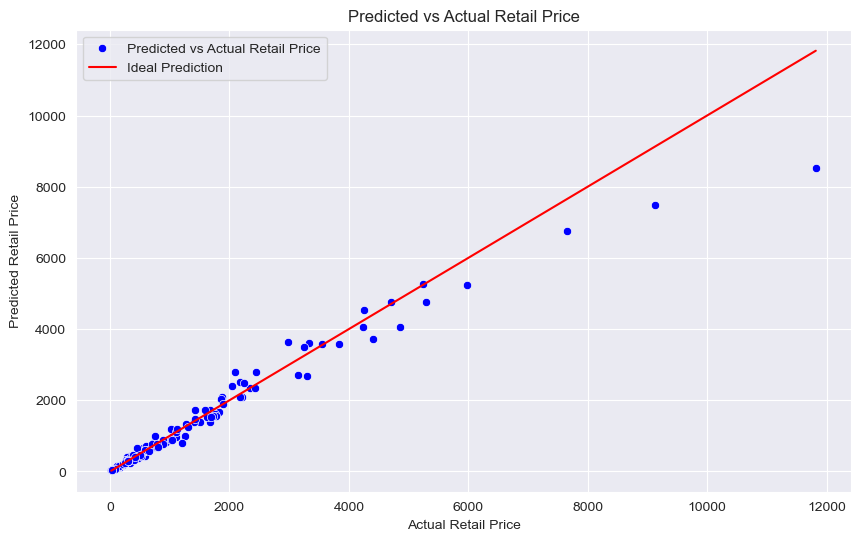

<Figure size 2000x2000 with 0 Axes>

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual Retail Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction')
plt.title('Predicted vs Actual Retail Price')
plt.xlabel('Actual Retail Price')
plt.ylabel('Predicted Retail Price')
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

This machine learning model allows us to see predicted and actual retail prices that can be utilized to optimally price products. For example, a clear example would be the product that's actual price is near 12k, our model predicts the retail price should be closer to 8k suggesting that the price should be lowered to hopefully maximize profits while having satisfied customers. Using this model, prices can be adjusted accordingly in such a way that there is balance between profit and customer attraction.